In [1]:
import pandas as pd


In [6]:
file_path = 'ClectivSampleDataCreatorCampaignPerformance.csv'
df = pd.read_csv(file_path)
df.head()

,Account,Platform,URL,Followers,Engagement Rate,Campaign Engagement Rate,Total Engagements,Media Count,Posts Count,Stories Count,Aggregate Impressions
0,lauralestyle,tiktok,https://tiktok.com/@lauralestyle,126264.0,0.49,1.21,1523.0,1.0,1.0,0.0,36681.0
1,dina.sweethome.style_,tiktok,https://tiktok.com/@dina.sweethome.style_,40023.0,0.66,0.27,110.0,1.0,1.0,0.0,3876.0
2,evanabowell,tiktok,https://tiktok.com/@evanabowell,17869.0,1.06,0.53,189.0,2.0,2.0,0.0,8855.0
3,she.is.liv,tiktok,https://tiktok.com/@she.is.liv,83.0,13.25,43.98,73.0,2.0,2.0,0.0,2067.0
4,oakbankreno,tiktok,https://tiktok.com/@oakbankreno,347.0,13.26,5.48,38.0,2.0,2.0,0.0,2286.0


In [7]:
df.describe(include='all')

,Account,Platform,URL,Followers,Engagement Rate,Campaign Engagement Rate,Total Engagements,Media Count,Posts Count,Stories Count,Aggregate Impressions
count,90,90,90,9.000000e+01,90.000000,82.000000,90.000000,90.000000,90.000000,90.000000,9.000000e+01
unique,80,2,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,lauralestyle,instagram,https://tiktok.com/@lauralestyle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,80,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,8.105030e+04,1.840333,2.954390,2227.566667,4.244444,2.800000,1.444444,6.488734e+04
std,NaN,NaN,NaN,1.609025e+05,8.770089,13.180942,14972.515618,6.184997,3.308824,4.003120,2.251389e+05
min,NaN,NaN,NaN,3.300000e+01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,NaN,NaN,NaN,1.064425e+04,0.092500,0.077500,24.250000,1.000000,1.000000,0.000000,4.379750e+03
50%,NaN,NaN,NaN,3.294950e+04,0.345000,0.455000,145.000000,2.000000,2.000000,0.000000,1.834200e+04
75%,NaN,NaN,NaN,7.328700e+04,0.890000,1.185000,643.750000,4.000000,3.000000,1.000000,3.861375e+04


In [8]:
print(df.dtypes)



Account                      object
Platform                     object
URL                          object
Followers                   float64
Engagement Rate             float64
Campaign Engagement Rate    float64
Total Engagements           float64
Media Count                 float64
Posts Count                 float64
Stories Count               float64
Aggregate Impressions       float64
dtype: object


In [9]:
print(df.isnull().sum())

Account                     909
Platform                    909
URL                         909
Followers                   909
Engagement Rate             909
Campaign Engagement Rate    917
Total Engagements           909
Media Count                 909
Posts Count                 909
Stories Count               909
Aggregate Impressions       909
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Account                   90 non-null     object 
 1   Platform                  90 non-null     object 
 2   URL                       90 non-null     object 
 3   Followers                 90 non-null     float64
 4   Engagement Rate           90 non-null     float64
 5   Campaign Engagement Rate  82 non-null     float64
 6   Total Engagements         90 non-null     float64
 7   Media Count               90 non-null     float64
 8   Posts Count               90 non-null     float64
 9   Stories Count             90 non-null     float64
 10  Aggregate Impressions     90 non-null     float64
dtypes: float64(8), object(3)
memory usage: 86.0+ KB


In [11]:
numeric_cols = ['Followers', 'Engagement Rate', 'Campaign Engagement Rate', 'Total Engagements', 
                'Media Count', 'Posts Count', 'Stories Count', 'Aggregate Impressions']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())  # filling 'mean' value in null


In [12]:
categorical_cols = ['Account', 'Platform', 'URL']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  


In [13]:
# Droping duplicates rows, if any
df = df.drop_duplicates()


In [14]:
df['URL'] = df['URL'].str.lower()


In [15]:
# Save cleaned data to a new CSV file
df.to_csv('cleaned_campaign_performance.csv', index=False)
print("Data cleaning complete and saved to 'cleaned_campaign_performance.csv'")


Data cleaning complete and saved to 'cleaned_campaign_performance.csv'


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

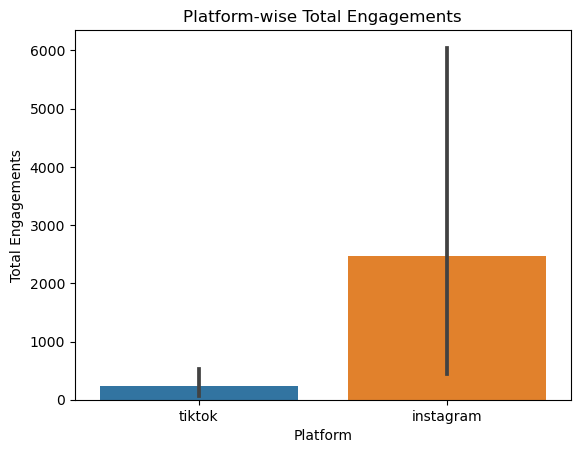

In [17]:
sns.barplot(x='Platform', y='Total Engagements', data=df)
plt.title('Platform-wise Total Engagements')
plt.show()


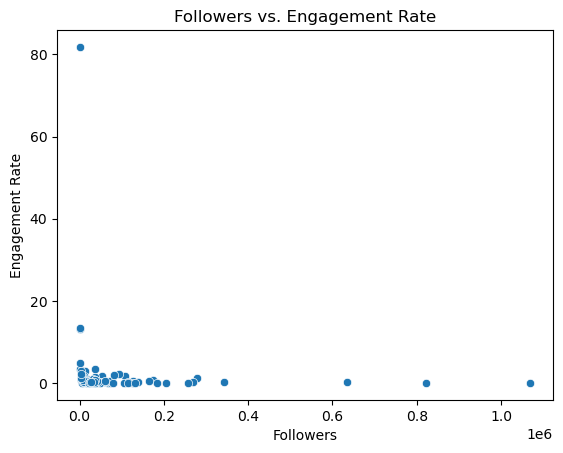

In [18]:
sns.scatterplot(x='Followers', y='Engagement Rate', data=df)
plt.title('Followers vs. Engagement Rate')
plt.xlabel('Followers')
plt.ylabel('Engagement Rate')
plt.show()


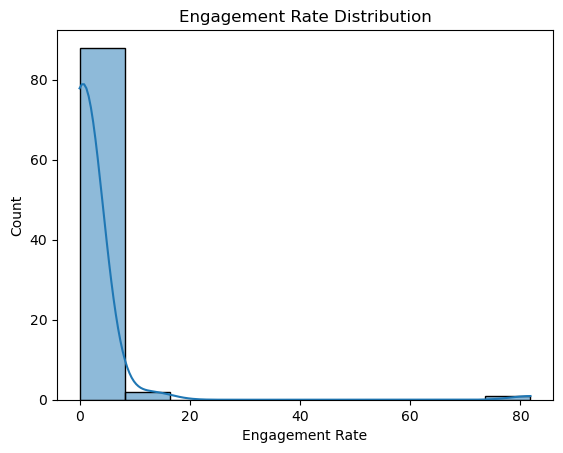

In [19]:
sns.histplot(df['Engagement Rate'], bins=10, kde=True)
plt.title('Engagement Rate Distribution')
plt.xlabel('Engagement Rate')
plt.show()


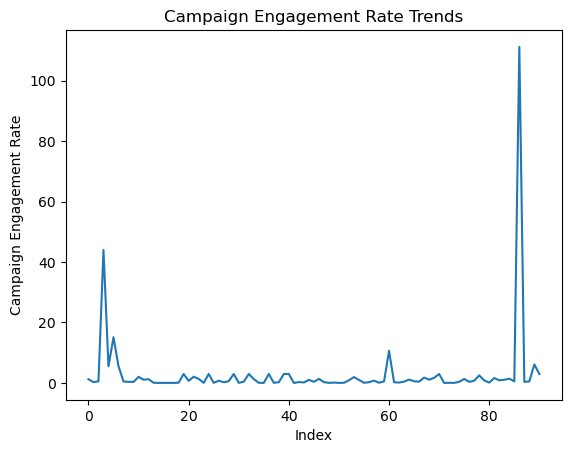

In [20]:
sns.lineplot(x=range(len(df)), y='Campaign Engagement Rate', data=df)
plt.title('Campaign Engagement Rate Trends')
plt.xlabel('Index')
plt.ylabel('Campaign Engagement Rate')
plt.show()


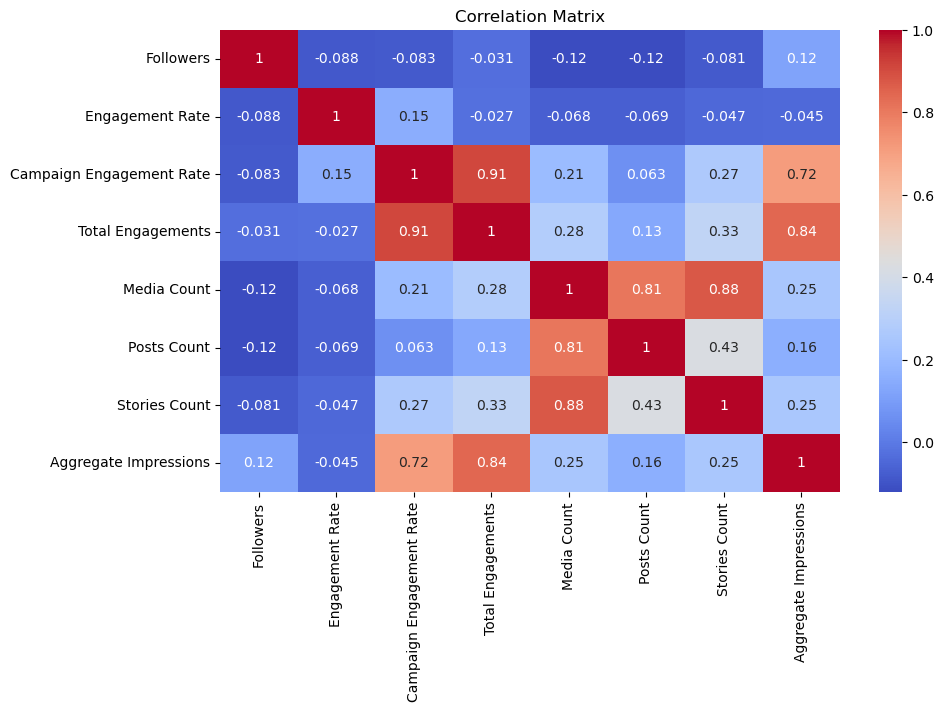

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
